#**MasterCard Stock Analysis**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings

In [82]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]
warnings.simplefilter(action='ignore', category=FutureWarning)

Load dataset

In [85]:
df = pd.read_csv("/content/Mastercard_stock_history[1].csv", index_col="Date", parse_dates=["Date"])

##**Data Preprocessing:**

In [86]:
df.shape

(3872, 7)

In [87]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [88]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0
2021-10-11,353.950012,354.880005,346.899994,347.149994,2766800,0.00,0.0


In [89]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


Check out null values

In [90]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Check datatype

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High          3872 non-null   float64
 2   Low           3872 non-null   float64
 3   Close         3872 non-null   float64
 4   Volume        3872 non-null   int64  
 5   Dividends     3872 non-null   float64
 6   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 242.0 KB


In [92]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
categorical_col = df.select_dtypes(include=['object'])

#Data Visualization and Time Series Analysis:

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Dividends'}>],
       [<Axes: title={'center': 'Stock Splits'}>, <Axes: >, <Axes: >]],
      dtype=object)

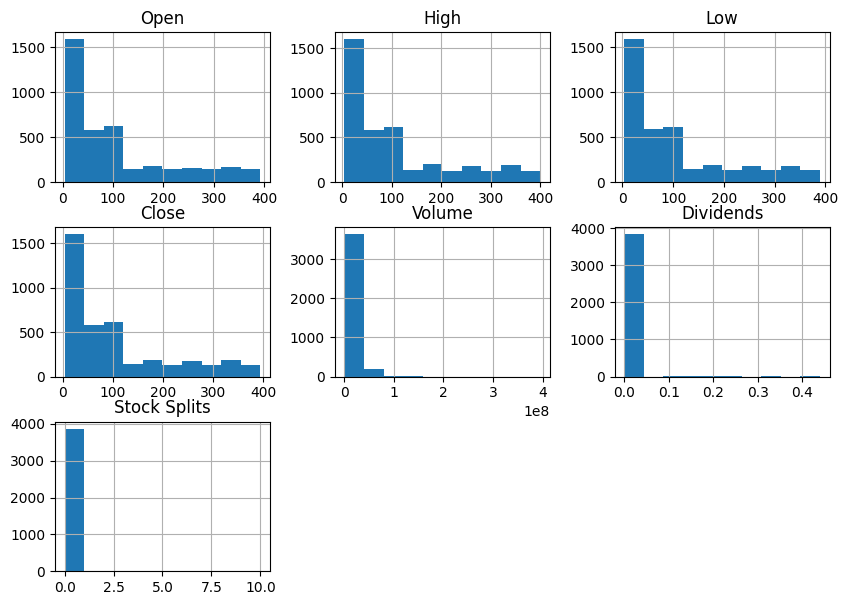

In [93]:
df.hist(figsize=(10,7))

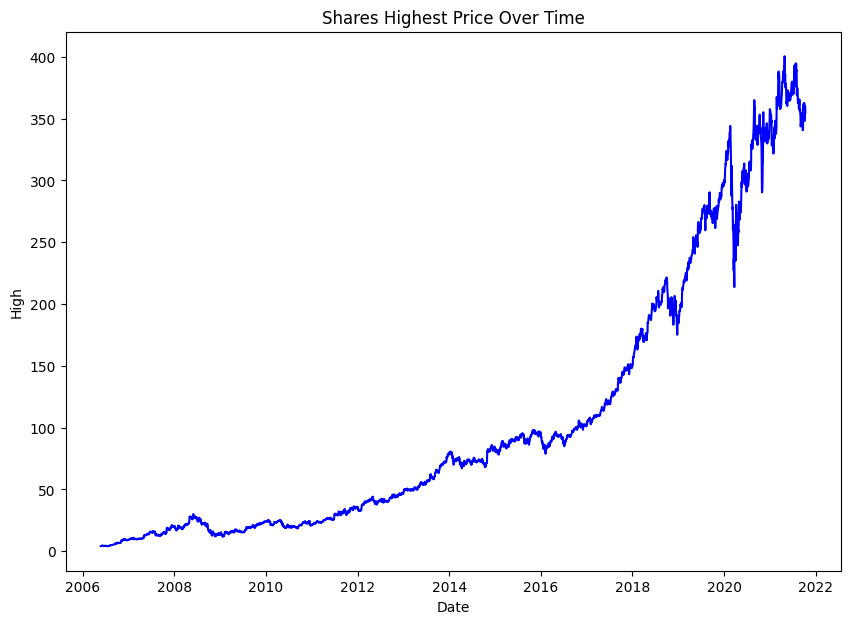

In [94]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='Date', y='High', color='blue')
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Shares Highest Price Over Time")
plt.show()

Text(0.5, 1.0, 'Stock Volume Analysis')

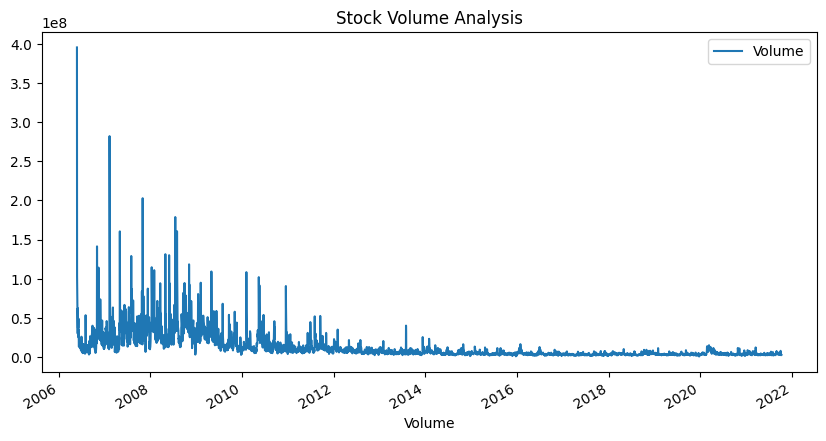

In [95]:
df[['Volume']].plot()
plt.xlabel('Volume')
plt.title('Stock Volume Analysis')

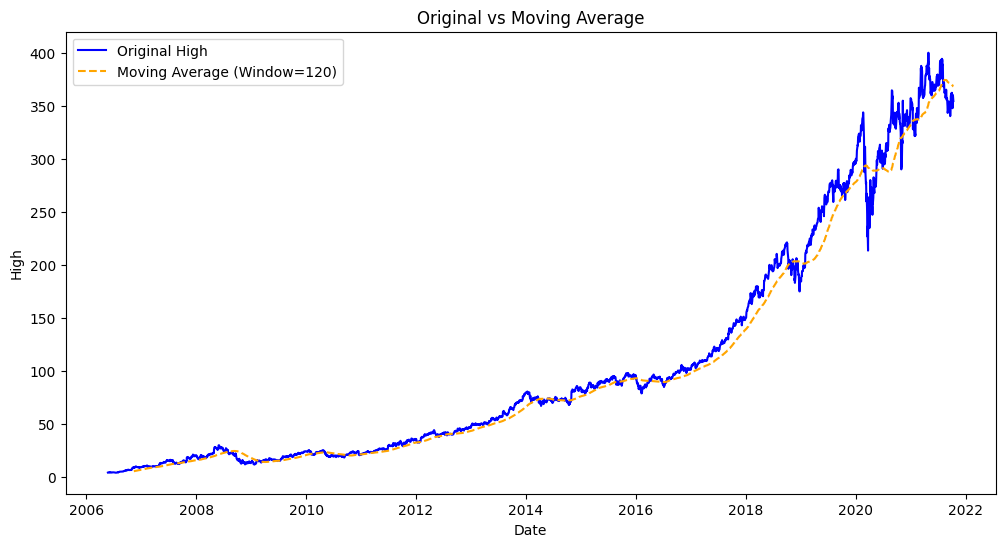

In [96]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

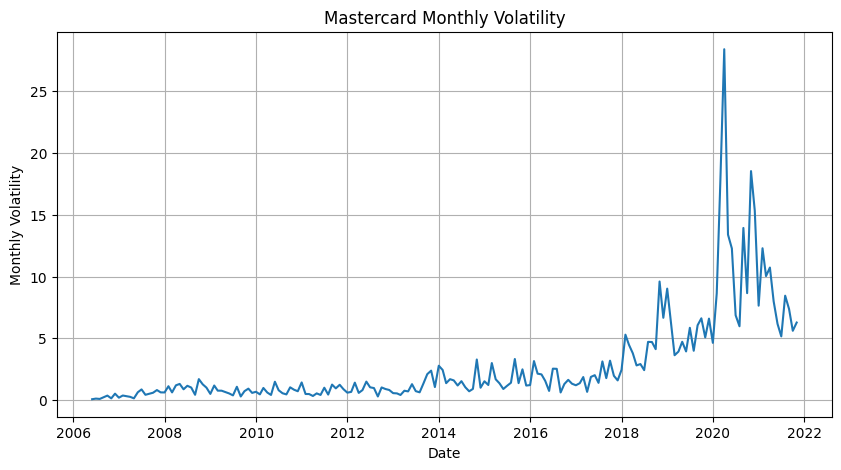

In [97]:
monthly_volatility = df['Close'].resample('M').std()

plt.figure(figsize=(10,5))
plt.plot(monthly_volatility)
plt.title("Mastercard Monthly Volatility")
plt.xlabel('Date')
plt.ylabel('Monthly Volatility')
plt.grid(True)
plt.show()

Split train and test data

In [98]:
train = df[(df.index.year<2021) & (df.index.year>=2016)]
test = df[df.index.year>=2021]

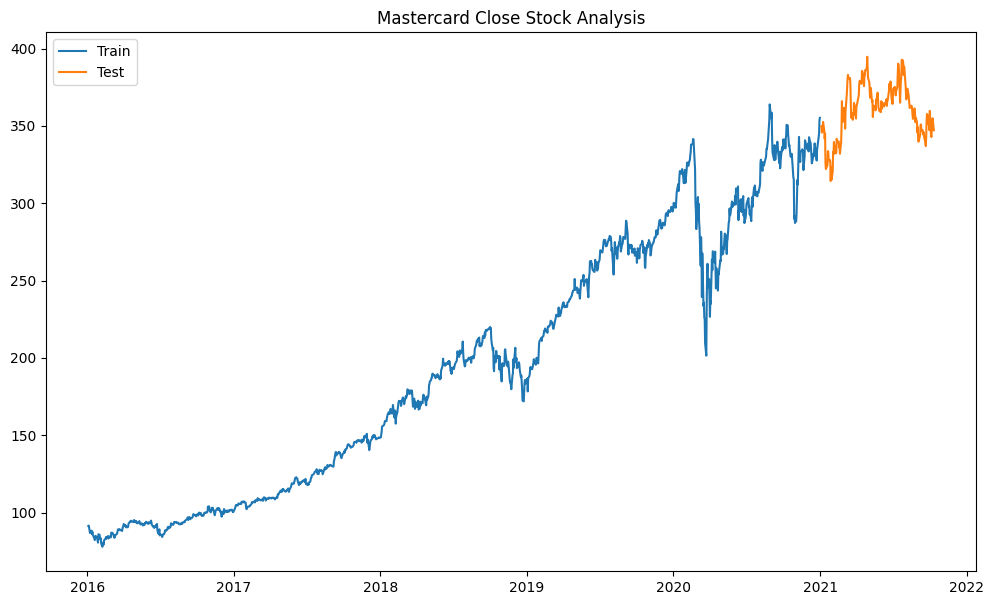

In [99]:
plt.figure(figsize=(12,7))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.legend()
plt.title('Mastercard Close Stock Analysis')
plt.show()

Noramlization:

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(train['Close'].values.reshape(-1, 1))

In [101]:
X_train = []
y_train = []
for i in range(80,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-80:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [102]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

#Building LSTM Model:

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras import callbacks, layers

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    layers.Dropout(0.2),

    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),

    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),

    layers.LSTM(units=50),
    layers.Dropout(0.2),

    layers.Dense(units=1),
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 80, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 80, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 80, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 80, 50)            0         
                                                                 
 lstm_20 (LSTM)              (None, 80, 50)            20200     
                                                                 
 dropout_11 (Dropout)        (None, 80, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 50)              

In [104]:
early_stop = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

In [105]:
model.fit(X_train,y_train,epochs=100,batch_size=24, callbacks=[early_stop])

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.0285 - mse: 0.0285 - mae: 0.1046 - mape: 37.7836

50/50 [==============================] - 16s 155ms/step - loss: 0.0285 - mse: 0.0285 - mae: 0.1046 - mape: 37.7836
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.0046 - mse: 0.0046 - mae: 0.0438 - mape: 11.1823

50/50 [==============================] - 6s 126ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0438 - mape: 11.1823
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 0.0047 - mse: 0.0047 - mae: 0.0462 - mape: 12.6365

50/50 [==============================] - 8s 154ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0462 - mape: 12.6365
Epoch 4/100
50/50 [==============================] - ETA: 0s - loss: 0.0044 - mse: 0.0044 - mae: 0.0438 - mape: 11.8419

50/50 [==============================] - 6s 125ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0438 - mape: 11.8419
Epoch 5/100
50/50 [==============================] - ETA: 0s - loss: 0.0045 - mse: 0.0045 - mae: 0.0434 - mape: 11.8171

50/50 [==============================] - 8s 154ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0434 - mape: 11.8171
Epoch 6/100
50/50 [==============================] - ETA: 0s - loss: 0.0038 - mse: 0.0038 - mae: 0.0402 - mape: 11.2527

50/50 [==============================] - 6s 125ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0402 - mape: 11.2527
Epoch 7/100
50/50 [==============================] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0423 - mape: 12.0053

50/50 [==============================] - 9s 184ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0423 - mape: 12.0053
Epoch 8/100
50/50 [==============================] - ETA: 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0381 - mape: 10.5456

50/50 [==============================] - 6s 126ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0381 - mape: 10.5456
Epoch 9/100
50/50 [==============================] - ETA: 0s - loss: 0.0038 - mse: 0.0038 - mae: 0.0425 - mape: 12.6834

50/50 [==============================] - 8s 154ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0425 - mape: 12.6834
Epoch 10/100
50/50 [==============================] - ETA: 0s - loss: 0.0033 - mse: 0.0033 - mae: 0.0377 - mape: 10.5898

50/50 [==============================] - 6s 126ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0377 - mape: 10.5898
Epoch 11/100
50/50 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0364 - mape: 9.9539

50/50 [==============================] - 8s 151ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0364 - mape: 9.9539
Epoch 12/100
50/50 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0371 - mape: 10.1267

50/50 [==============================] - 6s 125ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0371 - mape: 10.1267
Epoch 13/100
50/50 [==============================] - ETA: 0s - loss: 0.0032 - mse: 0.0032 - mae: 0.0379 - mape: 10.6757

50/50 [==============================] - 8s 153ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0379 - mape: 10.6757
Epoch 14/100
50/50 [==============================] - ETA: 0s - loss: 0.0032 - mse: 0.0032 - mae: 0.0377 - mape: 11.7269

50/50 [==============================] - 6s 128ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0377 - mape: 11.7269
Epoch 15/100
50/50 [==============================] - ETA: 0s - loss: 0.0033 - mse: 0.0033 - mae: 0.0390 - mape: 11.0114

50/50 [==============================] - 8s 149ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0390 - mape: 11.0114
Epoch 16/100
50/50 [==============================] - ETA: 0s - loss: 0.0036 - mse: 0.0036 - mae: 0.0397 - mape: 11.2364

50/50 [==============================] - 7s 130ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0397 - mape: 11.2364
Epoch 17/100
50/50 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0373 - mape: 10.1390

50/50 [==============================] - 7s 146ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0373 - mape: 10.1390
Epoch 18/100
50/50 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0369 - mape: 10.6652

50/50 [==============================] - 7s 135ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0369 - mape: 10.6652
Epoch 19/100
50/50 [==============================] - ETA: 0s - loss: 0.0032 - mse: 0.0032 - mae: 0.0368 - mape: 10.2236

50/50 [==============================] - 7s 143ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0368 - mape: 10.2236
Epoch 20/100
50/50 [==============================] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0354 - mape: 10.5344

50/50 [==============================] - 7s 147ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0354 - mape: 10.5344
Epoch 21/100
50/50 [==============================] - ETA: 0s - loss: 0.0032 - mse: 0.0032 - mae: 0.0377 - mape: 10.3493

50/50 [==============================] - 7s 132ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0377 - mape: 10.3493
Epoch 22/100
50/50 [==============================] - ETA: 0s - loss: 0.0029 - mse: 0.0029 - mae: 0.0368 - mape: 12.4738

50/50 [==============================] - 8s 152ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0368 - mape: 12.4738
Epoch 23/100
50/50 [==============================] - ETA: 0s - loss: 0.0027 - mse: 0.0027 - mae: 0.0356 - mape: 11.5228

50/50 [==============================] - 6s 126ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0356 - mape: 11.5228
Epoch 24/100
50/50 [==============================] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0333 - mape: 10.0664

50/50 [==============================] - 8s 154ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0333 - mape: 10.0664
Epoch 25/100
50/50 [==============================] - ETA: 0s - loss: 0.0026 - mse: 0.0026 - mae: 0.0341 - mape: 9.9264

50/50 [==============================] - 6s 124ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0341 - mape: 9.9264
Epoch 26/100
50/50 [==============================] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0308 - mape: 9.4041

50/50 [==============================] - 8s 155ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0308 - mape: 9.4041
Epoch 27/100
50/50 [==============================] - ETA: 0s - loss: 0.0027 - mse: 0.0027 - mae: 0.0340 - mape: 10.3549

50/50 [==============================] - 6s 123ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0340 - mape: 10.3549
Epoch 28/100
50/50 [==============================] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0333 - mape: 10.5988

50/50 [==============================] - 8s 155ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0333 - mape: 10.5988
Epoch 29/100
50/50 [==============================] - ETA: 0s - loss: 0.0027 - mse: 0.0027 - mae: 0.0342 - mape: 10.6759

50/50 [==============================] - 6s 125ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0342 - mape: 10.6759
Epoch 30/100
50/50 [==============================] - ETA: 0s - loss: 0.0023 - mse: 0.0023 - mae: 0.0331 - mape: 10.3606

50/50 [==============================] - 8s 156ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0331 - mape: 10.3606
Epoch 31/100
50/50 [==============================] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0311 - mape: 9.4454

50/50 [==============================] - 6s 125ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0311 - mape: 9.4454
Epoch 32/100
50/50 [==============================] - ETA: 0s - loss: 0.0023 - mse: 0.0023 - mae: 0.0322 - mape: 10.5286

50/50 [==============================] - 8s 157ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0322 - mape: 10.5286
Epoch 33/100
50/50 [==============================] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0312 - mape: 10.1116

50/50 [==============================] - 6s 125ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0312 - mape: 10.1116
Epoch 34/100
50/50 [==============================] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0329 - mape: 10.6859

50/50 [==============================] - 8s 151ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0329 - mape: 10.6859
Epoch 35/100
50/50 [==============================] - ETA: 0s - loss: 0.0026 - mse: 0.0026 - mae: 0.0349 - mape: 11.0861

50/50 [==============================] - 6s 126ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0349 - mape: 11.0861
Epoch 36/100
50/50 [==============================] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0307 - mape: 10.2275

50/50 [==============================] - 8s 157ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0307 - mape: 10.2275
Epoch 37/100
50/50 [==============================] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0304 - mape: 9.7910

50/50 [==============================] - 6s 125ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0304 - mape: 9.7910
Epoch 38/100
50/50 [==============================] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0307 - mape: 10.0880

50/50 [==============================] - 8s 151ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0307 - mape: 10.0880
Epoch 39/100
50/50 [==============================] - ETA: 0s - loss: 0.0023 - mse: 0.0023 - mae: 0.0331 - mape: 11.7727

50/50 [==============================] - 6s 125ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0331 - mape: 11.7727
Epoch 40/100
50/50 [==============================] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0309 - mape: 10.6132

50/50 [==============================] - 8s 154ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0309 - mape: 10.6132
Epoch 41/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0286 - mape: 9.9076

50/50 [==============================] - 6s 124ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0286 - mape: 9.9076
Epoch 42/100
50/50 [==============================] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0310 - mape: 11.0935

50/50 [==============================] - 8s 152ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0310 - mape: 11.0935
Epoch 43/100
50/50 [==============================] - ETA: 0s - loss: 0.0019 - mse: 0.0019 - mae: 0.0292 - mape: 9.6123

50/50 [==============================] - 6s 124ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0292 - mape: 9.6123
Epoch 44/100
50/50 [==============================] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0299 - mape: 10.3713

50/50 [==============================] - 8s 157ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0299 - mape: 10.3713
Epoch 45/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0298 - mape: 10.5131

50/50 [==============================] - 6s 127ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0298 - mape: 10.5131
Epoch 46/100
50/50 [==============================] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0290 - mape: 10.2488

50/50 [==============================] - 8s 151ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0290 - mape: 10.2488
Epoch 47/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0297 - mape: 11.5158

50/50 [==============================] - 6s 125ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0297 - mape: 11.5158
Epoch 48/100
50/50 [==============================] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0309 - mape: 10.9336

50/50 [==============================] - 8s 155ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0309 - mape: 10.9336
Epoch 49/100
50/50 [==============================] - ETA: 0s - loss: 0.0019 - mse: 0.0019 - mae: 0.0310 - mape: 11.0946

50/50 [==============================] - 6s 129ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0310 - mape: 11.0946
Epoch 50/100
50/50 [==============================] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0320 - mape: 11.4244

50/50 [==============================] - 8s 150ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0320 - mape: 11.4244
Epoch 51/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0292 - mape: 11.3090

50/50 [==============================] - 7s 134ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0292 - mape: 11.3090
Epoch 52/100
50/50 [==============================] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0286 - mape: 11.5139

50/50 [==============================] - 7s 145ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0286 - mape: 11.5139
Epoch 53/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0285 - mape: 10.2654

50/50 [==============================] - 7s 140ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0285 - mape: 10.2654
Epoch 54/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0292 - mape: 10.9249

50/50 [==============================] - 7s 143ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0292 - mape: 10.9249
Epoch 55/100
50/50 [==============================] - ETA: 0s - loss: 0.0019 - mse: 0.0019 - mae: 0.0292 - mape: 10.2609

50/50 [==============================] - 8s 151ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0292 - mape: 10.2609
Epoch 56/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0288 - mape: 10.5029

50/50 [==============================] - 6s 127ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0288 - mape: 10.5029
Epoch 57/100
50/50 [==============================] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0293 - mape: 11.2855

50/50 [==============================] - 8s 155ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0293 - mape: 11.2855
Epoch 58/100
50/50 [==============================] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0285 - mape: 10.7485

50/50 [==============================] - 6s 126ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0285 - mape: 10.7485
Epoch 59/100
50/50 [==============================] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0289 - mape: 11.2031

50/50 [==============================] - 8s 154ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0289 - mape: 11.2031
Epoch 60/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0279 - mape: 11.2544

50/50 [==============================] - 6s 126ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0279 - mape: 11.2544
Epoch 61/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0275 - mape: 11.0787

50/50 [==============================] - 8s 152ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0275 - mape: 11.0787
Epoch 62/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0289 - mape: 10.6953

50/50 [==============================] - 6s 127ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0289 - mape: 10.6953
Epoch 63/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0273 - mape: 10.9771

50/50 [==============================] - 8s 157ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0273 - mape: 10.9771
Epoch 64/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0282 - mape: 11.2503

50/50 [==============================] - 6s 126ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0282 - mape: 11.2503
Epoch 65/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0272 - mape: 10.7763

50/50 [==============================] - 8s 155ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0272 - mape: 10.7763
Epoch 66/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0281 - mape: 11.4812

50/50 [==============================] - 6s 126ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0281 - mape: 11.4812
Epoch 67/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0273 - mape: 11.3481

50/50 [==============================] - 8s 151ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0273 - mape: 11.3481
Epoch 68/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0284 - mape: 11.3845

50/50 [==============================] - 6s 124ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0284 - mape: 11.3845
Epoch 69/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0276 - mape: 10.9502

50/50 [==============================] - 8s 152ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0276 - mape: 10.9502
Epoch 70/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0269 - mape: 11.1866

50/50 [==============================] - 6s 126ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0269 - mape: 11.1866
Epoch 71/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0265 - mape: 10.8543

50/50 [==============================] - 8s 154ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0265 - mape: 10.8543
Epoch 72/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0280 - mape: 11.5155

50/50 [==============================] - 6s 124ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0280 - mape: 11.5155
Epoch 73/100
50/50 [==============================] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0284 - mape: 11.7632

50/50 [==============================] - 7s 150ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0284 - mape: 11.7632
Epoch 74/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0284 - mape: 12.2726

50/50 [==============================] - 6s 127ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0284 - mape: 12.2726
Epoch 75/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0276 - mape: 11.7590

50/50 [==============================] - 8s 152ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0276 - mape: 11.7590
Epoch 76/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0281 - mape: 12.5321

50/50 [==============================] - 7s 132ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0281 - mape: 12.5321
Epoch 77/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0260 - mape: 11.1672

50/50 [==============================] - 7s 146ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0260 - mape: 11.1672
Epoch 78/100
50/50 [==============================] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0300 - mape: 12.4965

50/50 [==============================] - 7s 136ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0300 - mape: 12.4965
Epoch 79/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0267 - mape: 11.2203

50/50 [==============================] - 7s 144ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0267 - mape: 11.2203
Epoch 80/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0287 - mape: 11.7803

50/50 [==============================] - 7s 140ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0287 - mape: 11.7803
Epoch 81/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0277 - mape: 12.6246

50/50 [==============================] - 7s 139ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0277 - mape: 12.6246
Epoch 82/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0282 - mape: 11.7167

50/50 [==============================] - 7s 142ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0282 - mape: 11.7167
Epoch 83/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0281 - mape: 11.5473

50/50 [==============================] - 7s 138ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0281 - mape: 11.5473
Epoch 84/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0271 - mape: 11.4464

50/50 [==============================] - 7s 148ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0271 - mape: 11.4464
Epoch 85/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0269 - mape: 11.8407

50/50 [==============================] - 7s 133ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0269 - mape: 11.8407
Epoch 86/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0274 - mape: 11.9888

50/50 [==============================] - 8s 152ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0274 - mape: 11.9888
Epoch 87/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0267 - mape: 11.5434

50/50 [==============================] - 6s 127ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0267 - mape: 11.5434
Epoch 88/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0262 - mape: 11.7120

50/50 [==============================] - 8s 154ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0262 - mape: 11.7120
Epoch 89/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0265 - mape: 12.4777

50/50 [==============================] - 6s 124ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0265 - mape: 12.4777
Epoch 90/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0265 - mape: 12.0909

50/50 [==============================] - 8s 153ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0265 - mape: 12.0909
Epoch 91/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0266 - mape: 12.4195

50/50 [==============================] - 6s 125ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0266 - mape: 12.4195
Epoch 92/100
50/50 [==============================] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0251 - mape: 11.0159

50/50 [==============================] - 8s 155ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0251 - mape: 11.0159
Epoch 93/100
50/50 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016 - mae: 0.0282 - mape: 12.7177

50/50 [==============================] - 6s 126ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0282 - mape: 12.7177
Epoch 94/100
50/50 [==============================] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0263 - mape: 12.2722

50/50 [==============================] - 8s 155ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0263 - mape: 12.2722
Epoch 95/100
50/50 [==============================] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0272 - mape: 11.9412

50/50 [==============================] - 6s 126ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0272 - mape: 11.9412
Epoch 96/100
50/50 [==============================] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0263 - mape: 11.7072

50/50 [==============================] - 8s 156ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0263 - mape: 11.7072
Epoch 97/100
50/50 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0266 - mape: 11.7970

50/50 [==============================] - 6s 125ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0266 - mape: 11.7970
Epoch 98/100
50/50 [==============================] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0252 - mape: 11.5928

50/50 [==============================] - 8s 157ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0252 - mape: 11.5928
Epoch 99/100
50/50 [==============================] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0261 - mape: 11.6091

50/50 [==============================] - 6s 125ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0261 - mape: 11.6091
Epoch 100/100
50/50 [==============================] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0252 - mape: 11.7277

50/50 [==============================] - 8s 157ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0252 - mape: 11.7277


For prediction we have to repeat preprocessing and normalize the test set. For that we will transform then split the dataset into samples, reshape it, predict, and inverse transform the predictions into standard form.

In [106]:
dataset_total = df['Close']
inputs = dataset_total[len(dataset_total)-len(test['Close'].values) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [107]:
X_test = []

for i in range(80,len(inputs)):
    X_test.append(inputs[i-80:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted_stock = model.predict(X_test)
predicted_stock = scaler.inverse_transform(predicted_stock)

7/7 [==============================] - 2s 39ms/step


In [108]:
predictions = pd.DataFrame()
predictions['Actuals'] = test['Close']
predictions['Predictions'] = predicted_stock

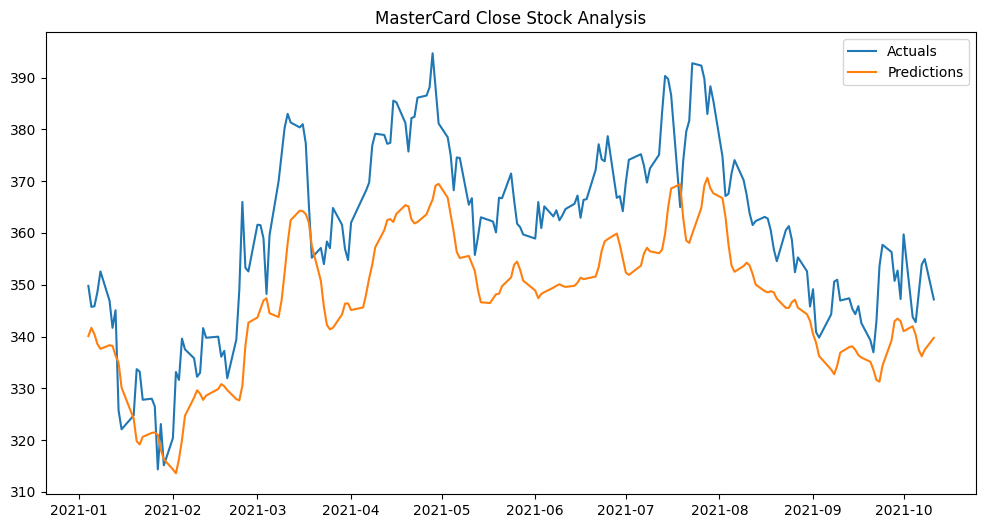

In [109]:
plt.figure(figsize=(12,6))
plt.title('MasterCard Close Stock Analysis')
plt.plot(predictions['Actuals'], label='Actuals')
plt.plot(predictions['Predictions'], label='Predictions')
plt.legend()
plt.show()

#**Let's try GRU:**

In [110]:
model_gru = Sequential()
model_gru.add(GRU(units=150, activation="tanh", input_shape=(X_train.shape[1],1)))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 150)               68850     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 69001 (269.54 KB)
Trainable params: 69001 (269.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model_gru.fit(X_train, y_train, epochs=30, batch_size=24)

Epoch 1/30
50/50 [==============================] - 6s 82ms/step - loss: 0.0086
Epoch 2/30
50/50 [==============================] - 4s 84ms/step - loss: 0.0015
Epoch 3/30
50/50 [==============================] - 3s 67ms/step - loss: 0.0012
Epoch 4/30
50/50 [==============================] - 3s 67ms/step - loss: 0.0011
Epoch 5/30
50/50 [==============================] - 5s 101ms/step - loss: 0.0010
Epoch 6/30
50/50 [==============================] - 3s 67ms/step - loss: 9.9003e-04
Epoch 7/30
50/50 [==============================] - 3s 68ms/step - loss: 7.5816e-04
Epoch 8/30
50/50 [==============================] - 4s 75ms/step - loss: 8.0288e-04
Epoch 9/30
50/50 [==============================] - 5s 89ms/step - loss: 7.0793e-04
Epoch 10/30
50/50 [==============================] - 3s 66ms/step - loss: 7.3591e-04
Epoch 11/30
50/50 [==============================] - 3s 66ms/step - loss: 6.4058e-04
Epoch 12/30
50/50 [==============================] - 5s 100ms/step - loss: 6.1221e-04
Epoch 1

In [112]:
gru_predicted_stock = model_gru.predict(X_test)
gru_predicted_stock = scaler.inverse_transform(gru_predicted_stock)

7/7 [==============================] - 1s 25ms/step


In [113]:
predictions = pd.DataFrame()
predictions['Actuals'] = test['Close']
predictions['GRU_Predictions'] = gru_predicted_stock

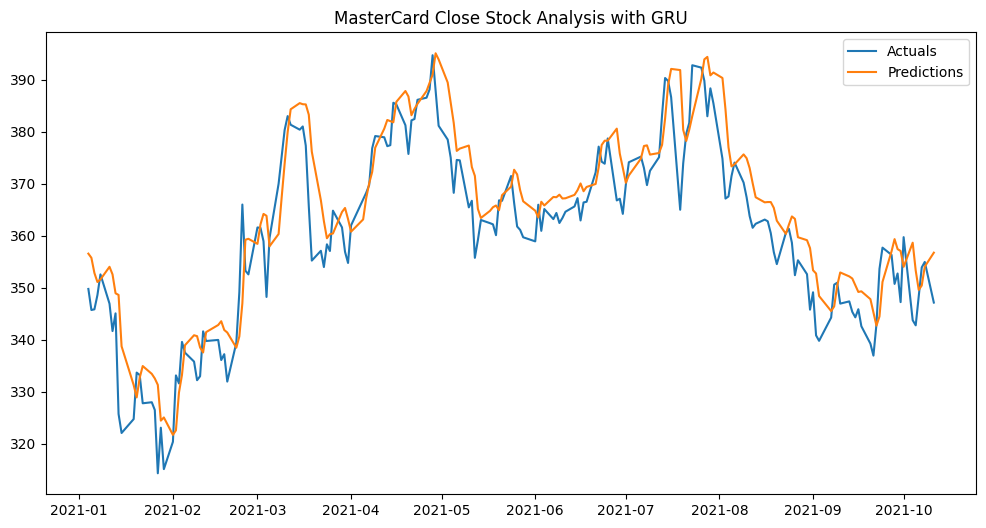

In [114]:
plt.figure(figsize=(12,6))
plt.title('MasterCard Close Stock Analysis with GRU')
plt.plot(predictions['Actuals'], label='Actuals')
plt.plot(predictions['GRU_Predictions'], label='Predictions')
plt.legend()
plt.show()

In [115]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

In [116]:
test = test['Close']
print("LSTM Mean Square Error:")
return_rmse(test,predicted_stock)

print('\n')
print("GRU Mean Square Error: ")
return_rmse(test,gru_predicted_stock)

LSTM Mean Square Error:
The root mean squared error is 15.28.


GRU Mean Square Error: 
The root mean squared error is 7.47.
